In [1]:
import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv('shimla_data.csv')

In [24]:
data

,Year,Month,Rain,T_max,T_min,Shimla,Shimla_Tourism,Shimla_Weather,Shimla_Travel,Recreation,Geographic Reference,Travel,Hotels & Accommodations,Air Travel,Bus & Rail,Car & Taxi,Tourist Destinations,Travel Agencies,Tourist Arrivals
0,2010.0,Jan,0.0000,3.0900,3.0900,65,58,21,31,0,53,57,17,7,46,0,58,0,165247
1,NaN,Feb,0.0000,3.8200,3.8200,56,62,10,22,0,58,57,31,21,60,22,49,2,155554
2,NaN,Mar,0.7640,12.5000,12.5000,79,71,11,34,0,80,77,36,25,68,0,71,0,176551
3,NaN,Apr,0.0000,13.6200,13.6200,88,83,17,32,0,82,92,46,36,67,0,83,2,351393
4,NaN,May,4.0968,18.1500,18.1500,100,100,15,40,0,100,97,46,37,100,0,78,5,360096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,NaN,Aug,12.6692,20.3678,20.3678,43,2,24,6,0,44,35,9,7,34,1,30,<1,121224
152,NaN,Sep,0.7514,21.5404,21.5404,45,2,22,6,<1,44,35,9,10,34,1,31,<1,118791
153,NaN,Oct,0.0000,18.5166,18.5166,43,3,19,7,0,53,37,9,10,39,2,29,<1,132786
154,NaN,Nov,0.0000,13.1377,13.1377,46,2,22,9,0,54,39,11,8,40,1,32,<1,126147


In [25]:
# Assuming the first Year value is correct, fill missing Year values
data['Year'].fillna(method='ffill', inplace=True)

# Combine Year and Month into a single Date column
data['Date'] = pd.to_datetime(data['Year'].astype(int).astype(str) + '-' + data['Month'], format='%Y-%b')

# Drop the Year and Month columns
data = data.drop(['Year', 'Month'], axis=1)

In [26]:
# Check for missing data
missing_data = data.isnull().sum()
print("Missing Data:\n", missing_data)

# If there is missing data, you can handle it by filling with a specific value or using interpolation methods.
# For example, to fill missing values with the mean of the column:
data.fillna(data.mean(), inplace=True)


Missing Data:
 Rain                       0
T_max                      0
T_min                      0
Shimla                     0
Shimla_Tourism             0
Shimla_Weather             0
Shimla_Travel              0
Recreation                 0
Geographic Reference       0
Travel                     0
Hotels & Accommodations    0
Air Travel                 0
Bus & Rail                 0
Car & Taxi                 0
Tourist Destinations       0
Travel Agencies            0
Tourist Arrivals           0
Date                       0
dtype: int64


<ipython-input-26-86af53589cac>:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.mean(), inplace=True)
<ipython-input-26-86af53589cac>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [27]:
# Detect outliers using z-score
from scipy import stats

# Define a threshold for outliers (e.g., z-score > 3)
threshold = 3

# Compute the z-scores for numerical columns (excluding the 'Date' column)
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))

# Create a mask of rows where any numerical column has a z-score greater than the threshold
outliers_mask = (z_scores > threshold).any(axis=1)

# Identify the rows with outliers
outliers_data = data[outliers_mask]

# You can choose to remove the outliers or handle them differently (e.g., impute with median)
# Here, we remove the outliers
# data = data[~outliers_mask]
outliers_data
for index, row in data.iterrows():

  if index > 13 and index < 144:
    data["Tourist Arrivals"][index] = (data["Tourist Arrivals"][index - 12] + data["Tourist Arrivals"][index + 12])/2
  elif index < 13:
    data["Tourist Arrivals"][index] = data["Tourist Arrivals"][index + 12]
  else:
    data["Tourist Arrivals"][index] = data["Tourist Arrivals"][index - 12]

<ipython-input-27-1f8548c540b6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Tourist Arrivals"][index] = data["Tourist Arrivals"][index + 12]
<ipython-input-27-1f8548c540b6>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Tourist Arrivals"][index] = data["Tourist Arrivals"][index - 12]
<ipython-input-27-1f8548c540b6>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Tourist Arrivals"][index] = (data["Tourist Ar

In [28]:
data

,Rain,T_max,T_min,Shimla,Shimla_Tourism,Shimla_Weather,Shimla_Travel,Recreation,Geographic Reference,Travel,Hotels & Accommodations,Air Travel,Bus & Rail,Car & Taxi,Tourist Destinations,Travel Agencies,Tourist Arrivals,Date
0,0.0000,3.0900,3.0900,65,58,21,31,0,53,57,17,7,46,0,58,0,183556.000000,2010-01-01
1,0.0000,3.8200,3.8200,56,62,10,22,0,58,57,31,21,60,22,49,2,174609.000000,2010-02-01
2,0.7640,12.5000,12.5000,79,71,11,34,0,80,77,36,25,68,0,71,0,198760.000000,2010-03-01
3,0.0000,13.6200,13.6200,88,83,17,32,0,82,92,46,36,67,0,83,2,395110.000000,2010-04-01
4,4.0968,18.1500,18.1500,100,100,15,40,0,100,97,46,37,100,0,78,5,390553.000000,2010-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,12.6692,20.3678,20.3678,43,2,24,6,0,44,35,9,7,34,1,30,<1,102949.890137,2022-08-01
152,0.7514,21.5404,21.5404,45,2,22,6,<1,44,35,9,10,34,1,31,<1,111659.695801,2022-09-01
153,0.0000,18.5166,18.5166,43,3,19,7,0,53,37,9,10,39,2,29,<1,115464.112793,2022-10-01
154,0.0000,13.1377,13.1377,46,2,22,9,0,54,39,11,8,40,1,32,<1,110457.591797,2022-11-01


In [29]:
# Detect outliers using z-score
from scipy import stats

# Define a threshold for outliers (e.g., z-score > 3)
threshold = 3

# Compute the z-scores for numerical columns (excluding the 'Date' column)
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))

# Create a mask of rows where any numerical column has a z-score greater than the threshold
outliers_mask = (z_scores > threshold).any(axis=1)

# Identify the rows with outliers
outliers_data = data[outliers_mask]

# You can choose to remove the outliers or handle them differently (e.g., impute with median)
# Here, we remove the outliers
# data = data[~outliers_mask]
outliers_data

,Rain,T_max,T_min,Shimla,Shimla_Tourism,Shimla_Weather,Shimla_Travel,Recreation,Geographic Reference,Travel,Hotels & Accommodations,Air Travel,Bus & Rail,Car & Taxi,Tourist Destinations,Travel Agencies,Tourist Arrivals,Date
0,0.0000,3.0900,3.0900,65,58,21,31,0,53,57,17,7,46,0,58,0,183556.000000,2010-01-01
2,0.7640,12.5000,12.5000,79,71,11,34,0,80,77,36,25,68,0,71,0,198760.000000,2010-03-01
3,0.0000,13.6200,13.6200,88,83,17,32,0,82,92,46,36,67,0,83,2,395110.000000,2010-04-01
4,4.0968,18.1500,18.1500,100,100,15,40,0,100,97,46,37,100,0,78,5,390553.000000,2010-05-01
5,0.0000,20.4100,20.4100,84,79,17,36,0,85,83,38,32,76,0,80,0,432559.000000,2010-06-01
11,0.0000,5.0200,5.0200,72,33,33,30,0,62,71,30,19,67,13,70,1,157230.000000,2010-12-01
19,35.6439,22.2000,22.2000,49,28,8,13,0,43,47,16,8,42,5,46,<1,250601.500000,2011-08-01
54,26.8694,19.9343,19.9343,49,15,16,12,0,47,44,16,9,46,3,40,1,204116.937500,2014-07-01
79,34.0039,20.9155,20.9155,48,7,15,7,0,49,40,13,9,44,1,38,<1,265933.484375,2016-08-01
87,0.0000,16.1145,16.1145,64,8,24,13,0,71,60,19,31,61,1,46,1,312899.046875,2017-04-01


In [30]:
data['Tourist Arrivals']

0      183556.000000
1      174609.000000
2      198760.000000
3      395110.000000
4      390553.000000
           ...      
151    102949.890137
152    111659.695801
153    115464.112793
154    110457.591797
155    195949.932617
Name: Tourist Arrivals, Length: 156, dtype: float64

In [31]:
from sklearn.preprocessing import StandardScaler

# Separate the target variable (Tourist Arrivals)
target = data['Tourist Arrivals']
data = data.drop(['Tourist Arrivals'], axis=1)

# Select numerical columns for normalization
numerical_cols = data.select_dtypes(include=np.number).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Add the Target column back to the dataset
data['Tourist Arrivals'] = target


In [32]:
data

,Rain,T_max,T_min,Shimla,Shimla_Tourism,Shimla_Weather,Shimla_Travel,Recreation,Geographic Reference,Travel,Hotels & Accommodations,Air Travel,Bus & Rail,Car & Taxi,Tourist Destinations,Travel Agencies,Date,Tourist Arrivals
0,-0.397005,-1.650689,-1.650689,0.838802,2.710890,-0.180415,3.173291,0,0.027634,0.572920,0.065293,-0.842740,-0.117647,0,1.335399,0,2010-01-01,183556.000000
1,-0.397005,-1.538694,-1.538694,0.175322,2.960978,-0.857861,1.698026,0,0.315025,0.572920,1.917246,1.692445,0.787077,22,0.579391,2,2010-02-01,174609.000000
2,-0.272100,-0.207028,-0.207028,1.870884,3.523676,-0.796275,3.665047,0,1.579549,1.957514,2.578657,2.416784,1.304062,0,2.427411,0,2010-03-01,198760.000000
3,-0.397005,-0.035200,-0.035200,2.534365,4.273940,-0.426759,3.337210,0,1.694506,2.995960,3.901480,4.408715,1.239439,0,3.435422,2,2010-04-01,395110.000000
4,0.272774,0.659783,0.659783,3.419006,5.336814,-0.549931,4.648557,0,2.729116,3.342108,3.901480,4.589800,3.372002,0,3.015418,5,2010-05-01,390553.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,1.674261,1.000033,1.000033,-0.783040,-0.790342,0.004343,-0.924668,0,-0.489671,-0.950133,-0.992965,-0.842740,-0.893125,1,-1.016627,<1,2022-08-01,102949.890137
152,-0.274160,1.179930,1.179930,-0.635600,-0.790342,-0.118829,-0.924668,<1,-0.489671,-0.950133,-0.992965,-0.299486,-0.893125,1,-0.932626,<1,2022-09-01,111659.695801
153,-0.397005,0.716026,0.716026,-0.783040,-0.727820,-0.303587,-0.760749,0,0.027634,-0.811674,-0.992965,-0.299486,-0.570009,2,-1.100627,<1,2022-10-01,115464.112793
154,-0.397005,-0.109193,-0.109193,-0.561879,-0.790342,-0.118829,-0.432913,0,0.085112,-0.673215,-0.728401,-0.661656,-0.505386,1,-0.848625,<1,2022-11-01,110457.591797


In [33]:
# import pandas as pd

# # Assuming 'data' is your DataFrame
# categorical_columns = data.select_dtypes(include=['object']).columns

# if len(categorical_columns) > 0:
#     print("Categorical columns found:")
#     for column in categorical_columns:
#         print(column)
# else:
#     print("No categorical columns found.")


In [34]:
# # Assuming 'data' is your DataFrame

# # Check if categorical columns are found
# categorical_columns = data.select_dtypes(include=['object']).columns

# if len(categorical_columns) > 0:
#     print("Categorical columns found:")
#     for column in categorical_columns:
#         print(column)

#     # Perform one-hot encoding for categorical columns
#     data = pd.get_dummies(data, columns=categorical_columns)

#     print("One-hot encoding completed.")
# else:
#     print("No categorical columns found.")

# # Now, you can proceed with training your Linear Regression model



In [35]:
data = data.replace(to_replace="<1",
           value=0)

In [36]:
data

,Rain,T_max,T_min,Shimla,Shimla_Tourism,Shimla_Weather,Shimla_Travel,Recreation,Geographic Reference,Travel,Hotels & Accommodations,Air Travel,Bus & Rail,Car & Taxi,Tourist Destinations,Travel Agencies,Date,Tourist Arrivals
0,-0.397005,-1.650689,-1.650689,0.838802,2.710890,-0.180415,3.173291,0,0.027634,0.572920,0.065293,-0.842740,-0.117647,0,1.335399,0,2010-01-01,183556.000000
1,-0.397005,-1.538694,-1.538694,0.175322,2.960978,-0.857861,1.698026,0,0.315025,0.572920,1.917246,1.692445,0.787077,22,0.579391,2,2010-02-01,174609.000000
2,-0.272100,-0.207028,-0.207028,1.870884,3.523676,-0.796275,3.665047,0,1.579549,1.957514,2.578657,2.416784,1.304062,0,2.427411,0,2010-03-01,198760.000000
3,-0.397005,-0.035200,-0.035200,2.534365,4.273940,-0.426759,3.337210,0,1.694506,2.995960,3.901480,4.408715,1.239439,0,3.435422,2,2010-04-01,395110.000000
4,0.272774,0.659783,0.659783,3.419006,5.336814,-0.549931,4.648557,0,2.729116,3.342108,3.901480,4.589800,3.372002,0,3.015418,5,2010-05-01,390553.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,1.674261,1.000033,1.000033,-0.783040,-0.790342,0.004343,-0.924668,0,-0.489671,-0.950133,-0.992965,-0.842740,-0.893125,1,-1.016627,0,2022-08-01,102949.890137
152,-0.274160,1.179930,1.179930,-0.635600,-0.790342,-0.118829,-0.924668,0,-0.489671,-0.950133,-0.992965,-0.299486,-0.893125,1,-0.932626,0,2022-09-01,111659.695801
153,-0.397005,0.716026,0.716026,-0.783040,-0.727820,-0.303587,-0.760749,0,0.027634,-0.811674,-0.992965,-0.299486,-0.570009,2,-1.100627,0,2022-10-01,115464.112793
154,-0.397005,-0.109193,-0.109193,-0.561879,-0.790342,-0.118829,-0.432913,0,0.085112,-0.673215,-0.728401,-0.661656,-0.505386,1,-0.848625,0,2022-11-01,110457.591797


In [37]:
data["Date"]

0     2010-01-01
1     2010-02-01
2     2010-03-01
3     2010-04-01
4     2010-05-01
         ...    
151   2022-08-01
152   2022-09-01
153   2022-10-01
154   2022-11-01
155   2022-12-01
Name: Date, Length: 156, dtype: datetime64[ns]

In [40]:
y = data["Date"]
y1 = y.to_numpy()
# data = data.drop(["Date"], axis = 1)
# data = data.insert(0, "Date", y1)
# data
print(data)

         Rain     T_max     T_min    Shimla  Shimla_Tourism  Shimla_Weather  \
0   -0.397005 -1.650689 -1.650689  0.838802        2.710890       -0.180415   
1   -0.397005 -1.538694 -1.538694  0.175322        2.960978       -0.857861   
2   -0.272100 -0.207028 -0.207028  1.870884        3.523676       -0.796275   
3   -0.397005 -0.035200 -0.035200  2.534365        4.273940       -0.426759   
4    0.272774  0.659783  0.659783  3.419006        5.336814       -0.549931   
..        ...       ...       ...       ...             ...             ...   
151  1.674261  1.000033  1.000033 -0.783040       -0.790342        0.004343   
152 -0.274160  1.179930  1.179930 -0.635600       -0.790342       -0.118829   
153 -0.397005  0.716026  0.716026 -0.783040       -0.727820       -0.303587   
154 -0.397005 -0.109193 -0.109193 -0.561879       -0.790342       -0.118829   
155 -0.397005 -0.947744 -0.947744  0.543922       -0.727820        1.543992   

     Shimla_Travel Recreation  Geographic Reference

In [41]:
data1 = data
data1

,Rain,T_max,T_min,Shimla,Shimla_Tourism,Shimla_Weather,Shimla_Travel,Recreation,Geographic Reference,Travel,Hotels & Accommodations,Air Travel,Bus & Rail,Car & Taxi,Tourist Destinations,Travel Agencies,Date,Tourist Arrivals
0,-0.397005,-1.650689,-1.650689,0.838802,2.710890,-0.180415,3.173291,0,0.027634,0.572920,0.065293,-0.842740,-0.117647,0,1.335399,0,2010-01-01,183556.000000
1,-0.397005,-1.538694,-1.538694,0.175322,2.960978,-0.857861,1.698026,0,0.315025,0.572920,1.917246,1.692445,0.787077,22,0.579391,2,2010-02-01,174609.000000
2,-0.272100,-0.207028,-0.207028,1.870884,3.523676,-0.796275,3.665047,0,1.579549,1.957514,2.578657,2.416784,1.304062,0,2.427411,0,2010-03-01,198760.000000
3,-0.397005,-0.035200,-0.035200,2.534365,4.273940,-0.426759,3.337210,0,1.694506,2.995960,3.901480,4.408715,1.239439,0,3.435422,2,2010-04-01,395110.000000
4,0.272774,0.659783,0.659783,3.419006,5.336814,-0.549931,4.648557,0,2.729116,3.342108,3.901480,4.589800,3.372002,0,3.015418,5,2010-05-01,390553.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,1.674261,1.000033,1.000033,-0.783040,-0.790342,0.004343,-0.924668,0,-0.489671,-0.950133,-0.992965,-0.842740,-0.893125,1,-1.016627,0,2022-08-01,102949.890137
152,-0.274160,1.179930,1.179930,-0.635600,-0.790342,-0.118829,-0.924668,0,-0.489671,-0.950133,-0.992965,-0.299486,-0.893125,1,-0.932626,0,2022-09-01,111659.695801
153,-0.397005,0.716026,0.716026,-0.783040,-0.727820,-0.303587,-0.760749,0,0.027634,-0.811674,-0.992965,-0.299486,-0.570009,2,-1.100627,0,2022-10-01,115464.112793
154,-0.397005,-0.109193,-0.109193,-0.561879,-0.790342,-0.118829,-0.432913,0,0.085112,-0.673215,-0.728401,-0.661656,-0.505386,1,-0.848625,0,2022-11-01,110457.591797


In [47]:
data1 = data.drop(["Date"], axis = 1)
data1 = data1.insert(0, "Date", y1)

In [48]:
print(data1)

         Rain     T_max     T_min    Shimla  Shimla_Tourism  Shimla_Weather  \
0   -0.397005 -1.650689 -1.650689  0.838802        2.710890       -0.180415   
1   -0.397005 -1.538694 -1.538694  0.175322        2.960978       -0.857861   
2   -0.272100 -0.207028 -0.207028  1.870884        3.523676       -0.796275   
3   -0.397005 -0.035200 -0.035200  2.534365        4.273940       -0.426759   
4    0.272774  0.659783  0.659783  3.419006        5.336814       -0.549931   
..        ...       ...       ...       ...             ...             ...   
151  1.674261  1.000033  1.000033 -0.783040       -0.790342        0.004343   
152 -0.274160  1.179930  1.179930 -0.635600       -0.790342       -0.118829   
153 -0.397005  0.716026  0.716026 -0.783040       -0.727820       -0.303587   
154 -0.397005 -0.109193 -0.109193 -0.561879       -0.790342       -0.118829   
155 -0.397005 -0.947744 -0.947744  0.543922       -0.727820        1.543992   

     Shimla_Travel Recreation  Geographic Reference

In [55]:
data2 = data1.insert(0, "Date", data["Date"])

ValueError: ignored

In [56]:
data1

,Date,Rain,T_max,T_min,Shimla,Shimla_Tourism,Shimla_Weather,Shimla_Travel,Recreation,Geographic Reference,Travel,Hotels & Accommodations,Air Travel,Bus & Rail,Car & Taxi,Tourist Destinations,Travel Agencies,Tourist Arrivals
0,2010-01-01,-0.397005,-1.650689,-1.650689,0.838802,2.710890,-0.180415,3.173291,0,0.027634,0.572920,0.065293,-0.842740,-0.117647,0,1.335399,0,183556.000000
1,2010-02-01,-0.397005,-1.538694,-1.538694,0.175322,2.960978,-0.857861,1.698026,0,0.315025,0.572920,1.917246,1.692445,0.787077,22,0.579391,2,174609.000000
2,2010-03-01,-0.272100,-0.207028,-0.207028,1.870884,3.523676,-0.796275,3.665047,0,1.579549,1.957514,2.578657,2.416784,1.304062,0,2.427411,0,198760.000000
3,2010-04-01,-0.397005,-0.035200,-0.035200,2.534365,4.273940,-0.426759,3.337210,0,1.694506,2.995960,3.901480,4.408715,1.239439,0,3.435422,2,395110.000000
4,2010-05-01,0.272774,0.659783,0.659783,3.419006,5.336814,-0.549931,4.648557,0,2.729116,3.342108,3.901480,4.589800,3.372002,0,3.015418,5,390553.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2022-08-01,1.674261,1.000033,1.000033,-0.783040,-0.790342,0.004343,-0.924668,0,-0.489671,-0.950133,-0.992965,-0.842740,-0.893125,1,-1.016627,0,102949.890137
152,2022-09-01,-0.274160,1.179930,1.179930,-0.635600,-0.790342,-0.118829,-0.924668,0,-0.489671,-0.950133,-0.992965,-0.299486,-0.893125,1,-0.932626,0,111659.695801
153,2022-10-01,-0.397005,0.716026,0.716026,-0.783040,-0.727820,-0.303587,-0.760749,0,0.027634,-0.811674,-0.992965,-0.299486,-0.570009,2,-1.100627,0,115464.112793
154,2022-11-01,-0.397005,-0.109193,-0.109193,-0.561879,-0.790342,-0.118829,-0.432913,0,0.085112,-0.673215,-0.728401,-0.661656,-0.505386,1,-0.848625,0,110457.591797


In [57]:
data1.to_csv('shimla_preprocessed_data.csv', index=False)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data' contains your preprocessed dataset

# Split the data into features (X) and the target variable (y)
X = data.drop(['Tourist Arrivals', 'Date'], axis=1)
y = data['Tourist Arrivals']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 3616497506.7079864
R-squared (R2) Score: 0.4770992023488404


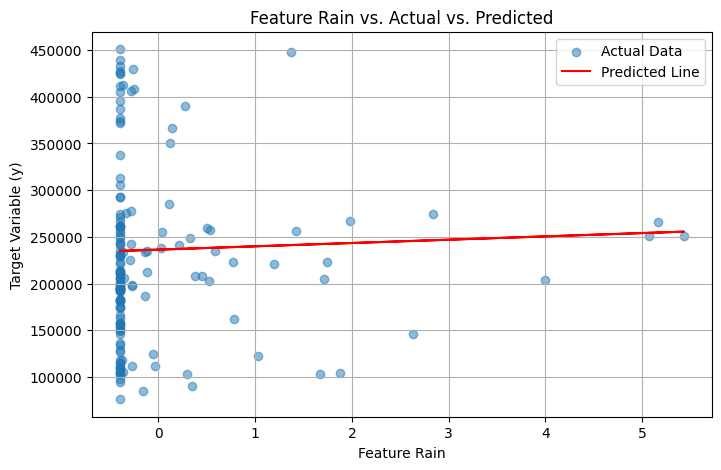

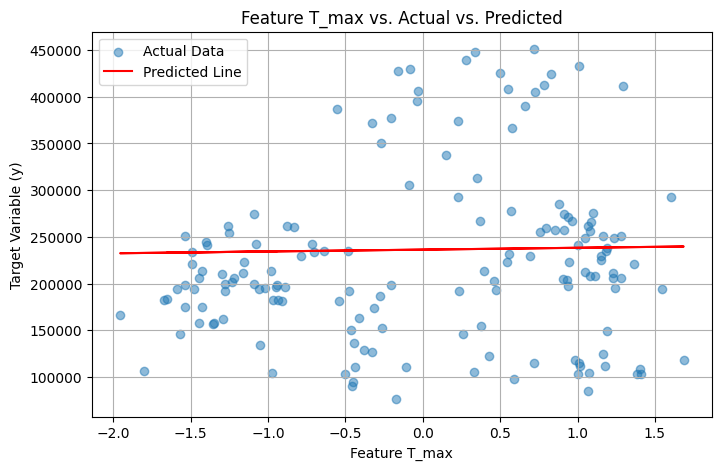

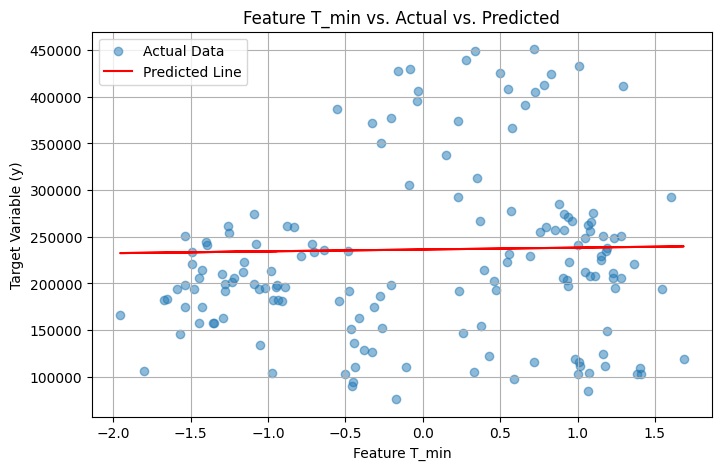

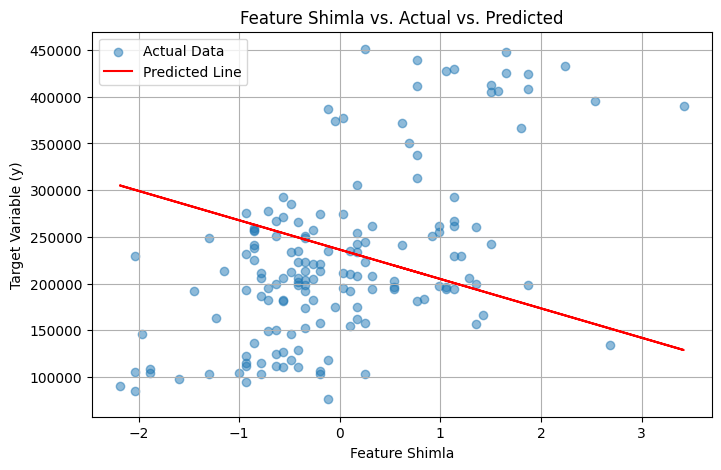

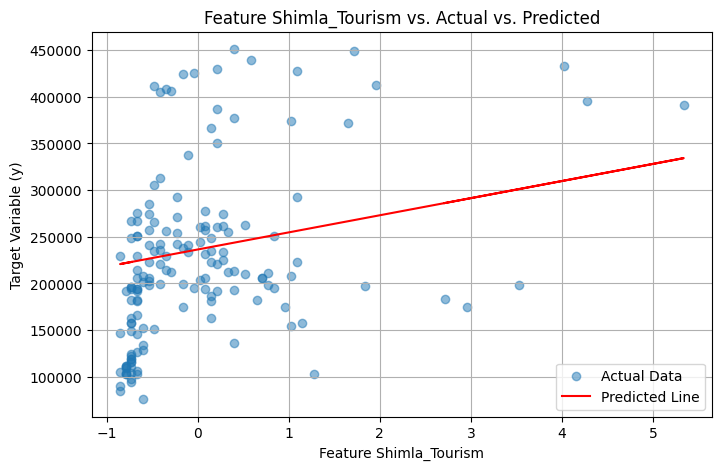

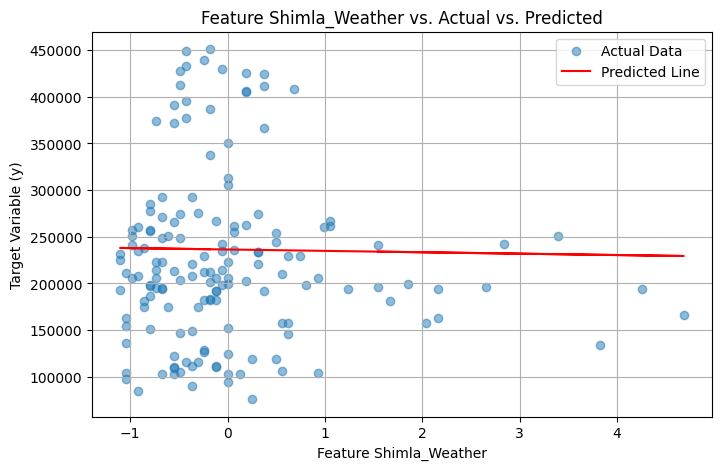

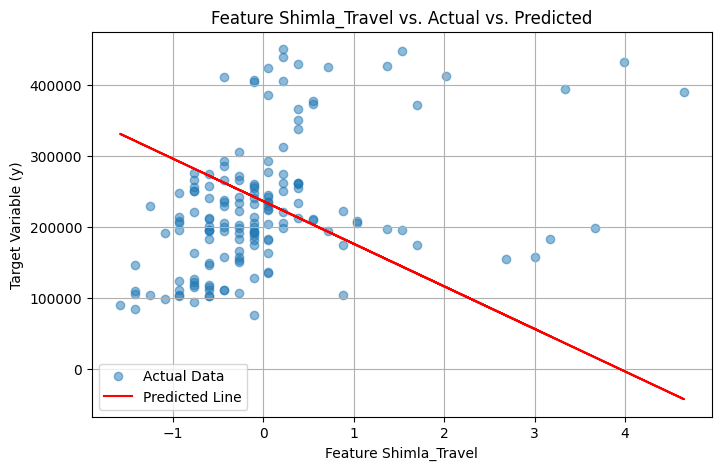

TypeError: ignored

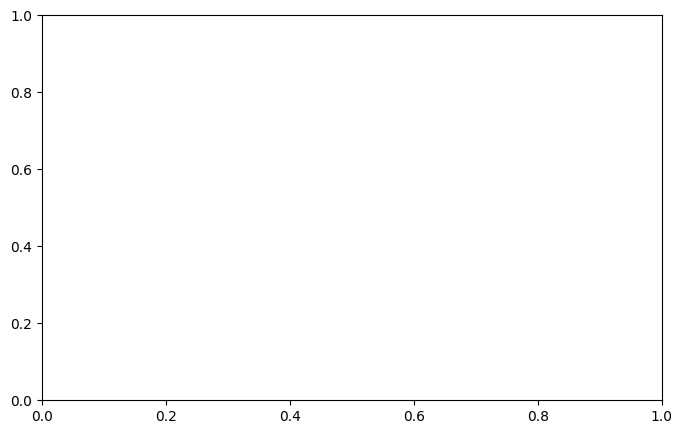

In [59]:
import matplotlib.pyplot as plt

# Assuming 'X' contains your feature data, 'y' contains your target variable
# 'y_pred' contains the predicted values from your linear regression model

# Get the number of features in X
num_features = X.shape[1]

# Create separate scatterplots for each feature against the target variable
for i in range(num_features):
    plt.figure(figsize=(8, 5))
    plt.scatter(X.iloc[:, i], y, alpha=0.5, label="Actual Data")

    # Get the corresponding predicted values for this feature
    y_pred_feature = X.iloc[:, i] * model.coef_[i] + model.intercept_

    plt.plot(X.iloc[:, i], y_pred_feature, color='red', label="Predicted Line")

    plt.xlabel(f"Feature {X.columns[i]}")
    plt.ylabel("Target Variable (y)")
    plt.title(f"Feature {X.columns[i]} vs. Actual vs. Predicted")
    plt.legend()
    plt.grid(True)
    plt.show()
